## **Predicting Exoplanet using Machine Learning.**

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle  #~/ symbol for root folder and .Kaggle for new folder

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
pwd

'/content'

In [ ]:
ls

kaggle.json  sample_data/


In [ ]:
ll

total 8
-rw-r--r-- 1 root   66 Dec 28 03:23 kaggle.json
drwxr-xr-x 1 root 4096 Dec 20 20:19 sample_data/


# Downloading Kaggle Dataset

In [ ]:
!kaggle datasets download -d keplersmachines/kepler-labelled-time-series-data

 98% 55.0M/55.9M [00:00<00:00, 108MB/s] 
100% 55.9M/55.9M [00:00<00:00, 101MB/s]


In [ ]:
!unzip /content/kepler-labelled-time-series-data.zip

Archive:  /content/kepler-labelled-time-series-data.zip
  inflating: exoTest.csv             
  inflating: exoTrain.csv            


In [ ]:
ll

total 341592
-rw-r--r-- 1 root  28907068 Sep 20  2019 exoTest.csv
-rw-r--r-- 1 root 262223348 Sep 20  2019 exoTrain.csv
-rw-r--r-- 1 root        66 Dec 28 03:23 kaggle.json
-rw-r--r-- 1 root  58642135 Dec 28 03:23 kepler-labelled-time-series-data.zip
drwxr-xr-x 1 root      4096 Dec 20 20:19 sample_data/


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv("/content/exoTrain.csv")
train_data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [ ]:
train_data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [ ]:
train_data.shape

(5087, 3198)

In [ ]:
# Commnd to display null values in the rows if any
train_data[train_data.isnull().any(axis=1)] #Using isnull() to select all rows with NaN under an entire DataFrame

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


Find all unique values present in the column 'LABEL'. At t = 1, the starlight intensity drops because it is partially obscured by the planet, given our position. The starlight rises back to its original value at t = 2. 
**LABEL -> 2 is an exoplanet star and 1 is a non-exoplanet-star.**

In [ ]:
train_data['LABEL'].unique()

array([2, 1])

There are two unique values that are present in 'LABEL' column i.e. 2 and 1

In [ ]:
# Extract stars with intensity t = 2
train_data.loc[train_data['LABEL'] == 2]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


In [ ]:
#  Getting the list of index values
list(train_data.loc[train_data['LABEL'] == 2].index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

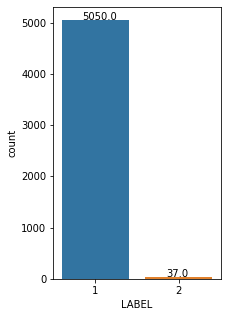

In [ ]:
plt.figure(figsize= (3,5))
ax = sns.countplot(x= 'LABEL', data = train_data)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Count value of 37 stars with LABEL 2. So there is a large imbalance in the data. Hence, balance the data using resampling technique RandonOverSampler after building the model with imbalanced data set to compare the results.

## **Label Replacement**

Replacing the labels for the ease of model in the terms of 0 and 1
*   Starts with exoplanet: 2 --> 1
*   starts without exoplanet: 1 --> 0



In [ ]:
train_data['LABEL'] = train_data['LABEL'].replace(1, 0) #FIRST CHANGE FROM 1 TO 0 OR EVERYTHING WILL BE 0
train_data['LABEL'] = train_data['LABEL'].replace(2, 1)
train_data.LABEL.unique()



array([1, 0])

In [ ]:
train_data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,0,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,0,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,0,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,0,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


## **Light Curve Visualization**

When a planet passes between an observer and the star, the flux value decreases and hence we see a dip in light curves with exoplanets

In [ ]:
train_data_new = train_data.drop('LABEL', axis =1)  #axis 1 is columns
train_data_new

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,384.34,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,238.51,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,6.29,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [ ]:
time = range(1, 3198)  #Flux values
flux_val = train_data_new.iloc[3,:].values 

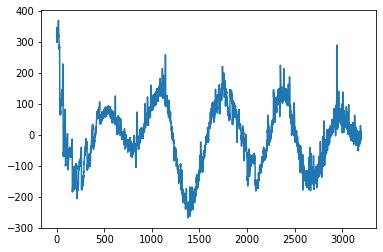

In [ ]:
# From train_data_new plotting a star randomly
plt.plot(time, flux_val)

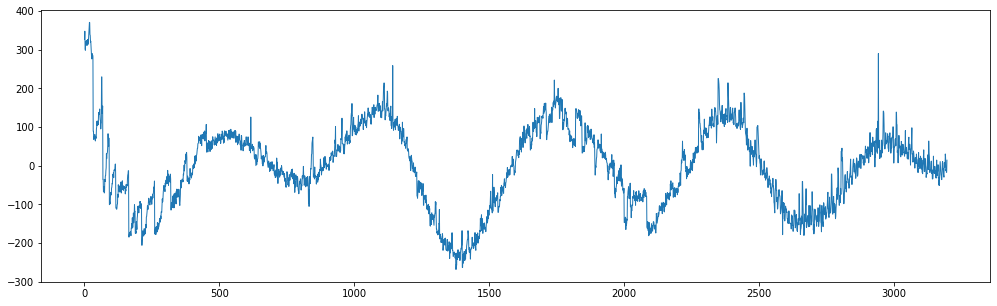

In [ ]:
plt.figure(figsize = (17,5))
plt.plot(time, flux_val, linewidth = 1)

The above pattern is of stars with exoplanet

In [ ]:
time = range(1, 3198)  #Flux values
flux_val = train_data_new.iloc[98,:].values 

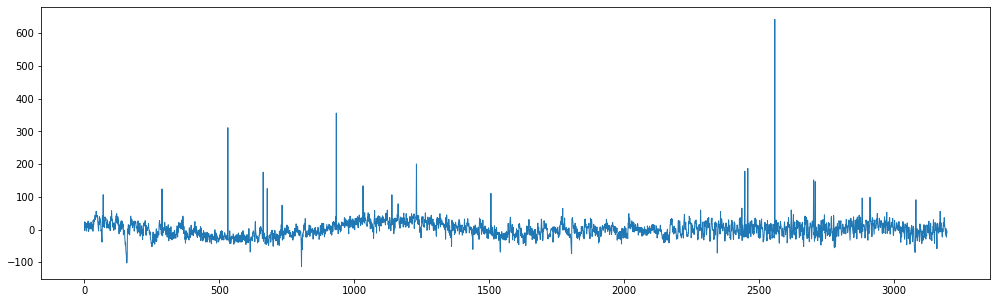

In [ ]:
plt.figure(figsize = (17,5))
plt.plot(time, flux_val, linewidth = 1)

The above pattern is of stars without exoplanet. There is too much noise in the data which have to remove for model to perform well.

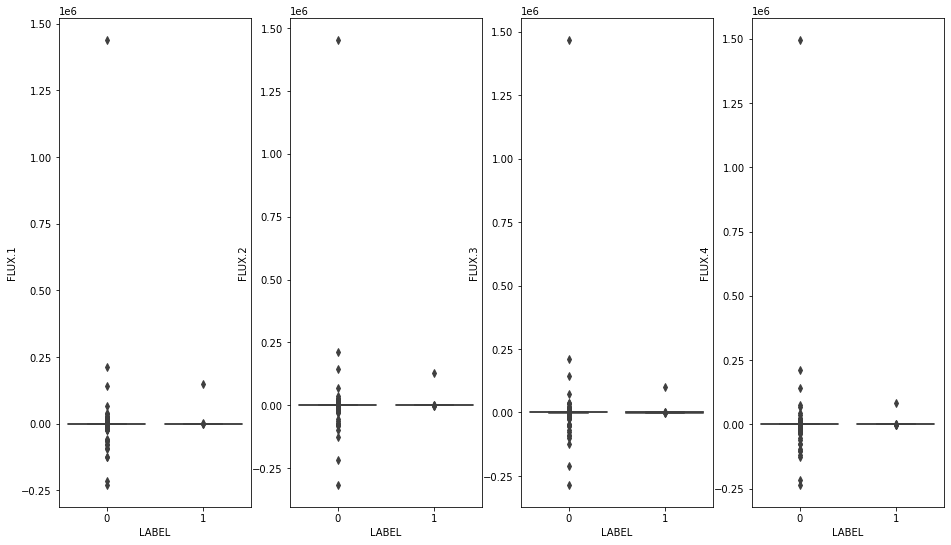

In [ ]:
plt.figure(figsize= (20,9))
for i in range (1,5):
  plt.subplot(1,5,i) 
  sns.boxplot(data=train_data, x = 'LABEL', y= 'FLUX.'+ str(i))


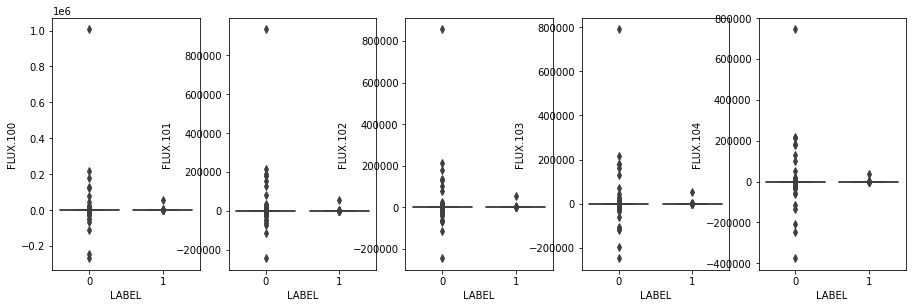

In [ ]:
plt.figure(figsize= (300,500))
for i in range (100,105):
  plt.subplot(90,95,i) 
  sns.boxplot(data=train_data, x = 'LABEL', y= 'FLUX.'+ str(i))

The flux values more than 0.25 x 10^6  are extreme outliers.So, dropping it 

In [ ]:
train_data.drop(train_data[train_data['FLUX.2']>0.25e6].index, axis = 0, inplace= True)

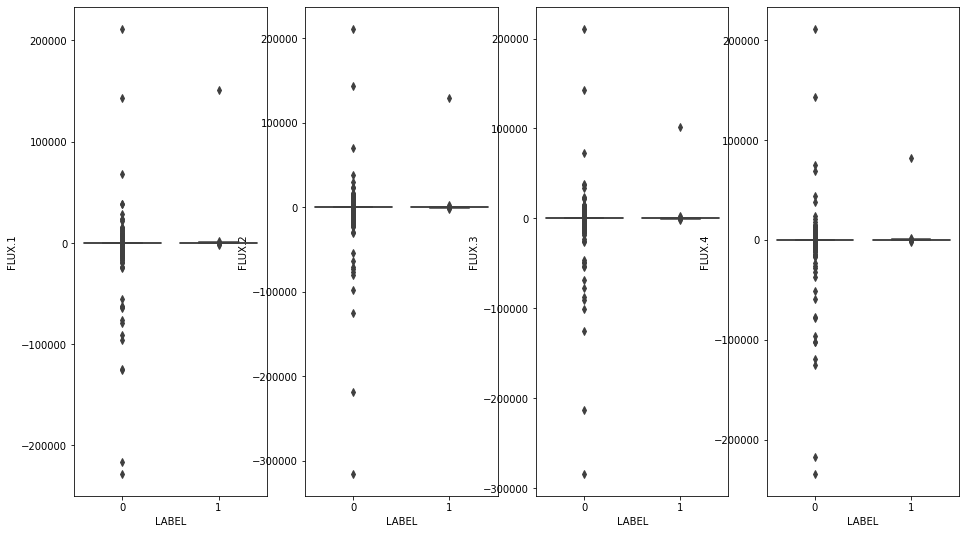

In [ ]:
plt.figure(figsize= (20,9))
for i in range (1,5):
  plt.subplot(1,5,i) # we will be plotting 5 plots and will be passing indexes i from 1 to 5
  sns.boxplot(data=train_data, x = 'LABEL', y= 'FLUX.'+ str(i))

the outliers is eliminated from all

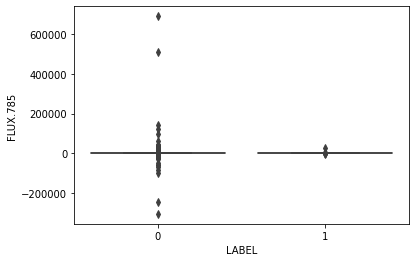

In [ ]:
#  we will verify it with any randomly selected box plot
sns.boxplot(data=train_data, x='LABEL', y = 'FLUX.' + str(np.random.randint(1000)))

### **K - Nearest Neighbors (KNN) Algorithm for Classification Tasks**

### Implementing KNN after handling the extreme outliers but have yet not balanced the data
*comparing the results with and without imbalance in our data. First starting with imbalanced data:-*

In [ ]:
# Extract dependent(y) and independent(x) features from train_data
x = train_data.drop(('LABEL'), axis = 1)
y = train_data.LABEL


In [ ]:
x , y

(       FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7   FLUX.8  \
 0       93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   -96.27   
 1      -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   -85.33   
 2      532.64   535.92   513.73   496.92   456.45   466.00  464.50   486.39   
 3      326.52   347.39   302.35   298.13   317.74   312.70  322.33   311.31   
 4    -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34 -1022.71   
 ...       ...      ...      ...      ...      ...      ...     ...      ...   
 5082   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   -49.25   
 5083   989.75   891.01   908.53   851.83   755.11   615.78  595.77   458.87   
 5084   273.39   278.00   261.73   236.99   280.73   264.90  252.92   254.88   
 5085     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85    -0.03   
 5086   323.28   306.36   293.16   287.67   249.89   218.30  188.86   178.93   
 
       FLUX.9  FLUX.10  ...  FLUX.3188

In [ ]:
# Use train_test_split() Method.
from sklearn.model_selection import train_test_split

# x_train, y_train, x_test, y_test = train_test_split(train_data, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0 )

In [ ]:
# Using StandardScaler() method and performing feature scaling. Used feature scaling so that all the values remain in the comparable range.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [ ]:
print("X_train after scaling ~\n")
np.min(x_train_sc), np.max(x_train_sc), np.mean(x_train_sc)

X_train after scaling ~



(-57.10397981586141, 59.4602261831905, 2.3099325230398324e-19)

In [ ]:
print("X_test after scaling ~\n")
np.min(x_test_sc), np.max(x_test_sc), np.mean(x_test_sc)

X_test after scaling ~



(-133.38032980241738, 112.17669130932964, 0.0006784625757485873)

In [ ]:
# Checking the minimum, mean and maxmum value after scaling
print("X_train after scaling ~\n")
print(f"Minimum:- {round(np.min(x_train_sc),2)}\nMean:- {round(np.mean(x_train_sc),2)}\nMax:- {round(np.max(x_train_sc), 2)}\n")
print("--------------------------------\n")
print("X_test after scaling ~\n")
print(f"Minimum:- {round(np.min(x_test_sc),2)}\nMean:- {round(np.mean(x_test_sc),2)}\nMax:- {round(np.max(x_test_sc), 2)}\n")

X_train after scaling ~

Minimum:- -57.1
Mean:- 0.0
Max:- 59.46

--------------------------------

X_test after scaling ~

Minimum:- -133.38
Mean:- 0.0
Max:- 112.18



In [ ]:
# Fitting KNN classifier model on the training data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() #'''metric is to be by default minkowski for p = 2 to calculate the Eucledian distances'''
# Fit the model
knn.fit(x_train_sc, y_train)
# Predict
y_pred = knn.predict(x_test_sc)
# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
print('\nValidation accuracy of KNN is', accuracy_score(y_test,y_pred))
print("\n-------------------------------------------------------")
print ("\nClassification report :\n",(classification_report(y_test,y_pred)))



Validation accuracy of KNN is 0.991480996068152

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1513
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1526
   macro avg       0.50      0.50      0.50      1526
weighted avg       0.98      0.99      0.99      1526



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


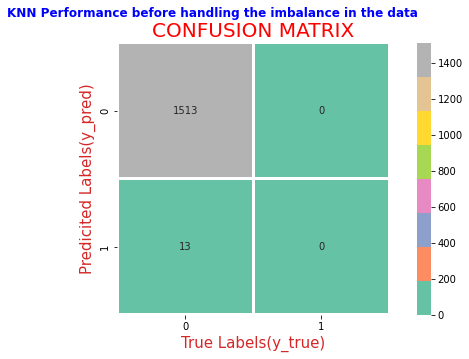

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#cm vizualization
import seaborn as sns 
f, ax =plt.subplots(figsize = (10,5))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance before handling the imbalance in the data", color = 'b', weight = 'bold')

sns.heatmap(cm,annot = True, cmap="Set2", linewidths= 2, linecolor="white", fmt="d", square = True, ax=ax)  #fmt changes the values inside the square box
plt.xlabel("True Labels(y_true)", fontsize = 15, color = 'tab:red')
plt.ylabel("Predicited Labels(y_pred)", fontsize = 15, color = 'tab:red')
plt.title("CONFUSION MATRIX",fontsize=20, color = 'r')
plt.show()

The True label does not predict exoplanet at all because of the imbalance in the data

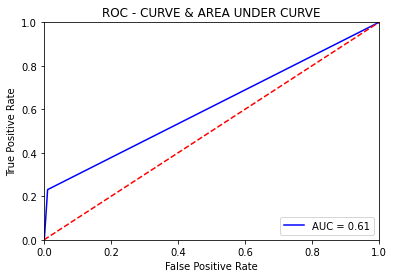

In [ ]:
#ROC curve and Area under the curve plotting
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(x_test_sc)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method: plt
import matplotlib.pyplot as plt
plt.title('ROC - CURVE & AREA UNDER CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Even though the accuracy is amazing, this isn't really a good model. This is **due to the huge imbalance in the dataset!**

So checking for other metrics like precission, recall, f1 score* in such models*. Beliving this as a very good model based on only the accuracy can really perform bad on an unseen data



## Handling the imbalance in the data and then applying KNN
*There are many techniques available. I am trying* ***RandomOverSampler***:-     
RandomOverSampler is over-sampling by duplicating some of the original samples of the minority class

In [ ]:
# Handling imbalanced data using RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
#This means that if the majority class had 1,000 examples and the minority class had 100.
# This strategy would oversampling the minority class so that it has 1,000 examples.

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy= 1) # This would ensure that the minority class was oversampled 
# to have half the number of examples as the majority class, for binary classification problems. majority class had 
# 1,000 examples and the minority class had 100, the transformed dataset would have 500 examples of the minority class.

# fit and apply the transform
x_over, y_over = oversample.fit_resample(x, y)

# summarize the old class distribution
print(Counter(y))

# summarize the new class distribution
print(Counter(y_over))

Counter({0: 5049, 1: 37})
Counter({1: 5049, 0: 5049})


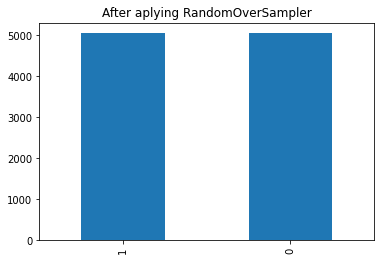

In [ ]:
# Putting it in a Visual form
y_over.value_counts().plot(kind='bar', title='After aplying RandomOverSampler');

#### Repeating the above steps

In [ ]:
# Use train_test_split() Method.
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state = 0 )

# Using StandardScaler() method and performing feature scaling. Using feature scaling so that all the values remain in the comparable range.

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test) 

In [ ]:
print("X_train after scaling ~\n")
np.min(x_train_sc), np.max(x_train_sc), np.mean(x_train_sc)

X_train after scaling ~



(-80.96864836053747, 83.74016392772705, 1.1477409873346022e-19)

In [ ]:
print("X_test after scaling ~\n")
np.min(x_test_sc), np.max(x_test_sc), np.mean(x_test_sc)

X_test after scaling ~



(-143.4199813522832, 437.8198857006237, 0.014213280234102454)

In [ ]:
# Checking the minimum, mean and maxmum value after scaling
print("X_train after scaling ~\n")
print(f"Minimum:- {round(np.min(x_train_sc),2)}\nMean:- {round(np.mean(x_train_sc),2)}\nMax:- {round(np.max(x_train_sc), 2)}\n")
print("--------------------------------\n")
print("X_test after scaling ~\n")
print(f"Minimum:- {round(np.min(x_test_sc),2)}\nMean:- {round(np.mean(x_test_sc),2)}\nMax:- {round(np.max(x_test_sc), 2)}\n")

X_train after scaling ~

Minimum:- -80.97
Mean:- 0.0
Max:- 83.74

--------------------------------

X_test after scaling ~

Minimum:- -143.42
Mean:- 0.01
Max:- 437.82



In [ ]:
# Create function to fetch the optimal value of K
def optimal_Kval_KNN(start_k, end_k, x_train, x_test, y_train, y_test, progress = True):
    # Header
    print(f"Fetching the optimal value of K in between {start_k} & {end_k} ~\n\nIn progress...")
    
    # Empty list to append error rate
    mean_err = []

    for K in range(start_k, end_k + 1):                         # Generates K from start to end-1 values
        knn = KNeighborsClassifier(n_neighbors = K)             # Build KNN for respective K value
        knn.fit(x_train, y_train)                               # Train the model
        err_rate = np.mean(knn.predict(x_test) != y_test)       # Get the error rate
        mean_err.append(err_rate)                               # Append it
        # If progress is true display the error rate for each K
        if progress == True:print(f'For K = {K}, mean error = {err_rate:.3}')
        
    # Get the optimal value of k and corresponding value of mean error
    k, val = mean_err.index(min(mean_err))+1, min(mean_err)
    
    print('\nDone! Here is how error rate varies wrt to K values:- \n')
    
    # Display how error rate changes wrt K values and mark the optimal K value
    plt.figure(figsize = (5,5))
    plt.plot(range(start_k,end_k + 1), mean_err, 'mo--', markersize = 8, markerfacecolor = 'c',
            linewidth = 1)          # plots all mean error wrt K values
    plt.plot(k, val, marker = 'o', markersize = 8, markerfacecolor = 'gold', 
             markeredgecolor = 'g') # highlits the optimal K
    plt.title(f"The optimal performance is obtained at K = {k}", color = 'r', weight = 'bold',
             fontsize = 15)
    plt.ylabel("Error Rate", color = 'olive', fontsize = 13)
    plt.xlabel("K values", color = 'olive', fontsize = 13)
    
    # returns the optimal value of k
    return k

Fetching the optimal value of K in between 1 & 10 ~

In progress...
For K = 1, mean error = 0.00132
For K = 2, mean error = 0.00132
For K = 3, mean error = 0.00264
For K = 4, mean error = 0.00264
For K = 5, mean error = 0.00462
For K = 6, mean error = 0.00462
For K = 7, mean error = 0.00528
For K = 8, mean error = 0.00528
For K = 9, mean error = 0.00792
For K = 10, mean error = 0.00792

Done! Here is how error rate varies wrt to K values:- 



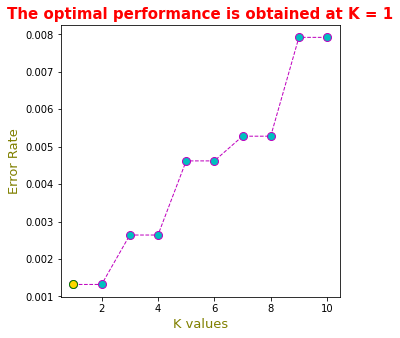

In [ ]:
k = optimal_Kval_KNN(1, 10, x_train_sc, x_test_sc, y_train, y_test)

In [ ]:
# Fitting KNN classifier model on the training data
from sklearn.neighbors import KNeighborsClassifier

# Choosing K = 1
knn = KNeighborsClassifier(n_neighbors=1) 
# Fit the model
knn.fit(x_train_sc, y_train)
# Predict
y_pred = knn.predict(x_test_sc)
# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
print('\nValidation accuracy of KNN is', accuracy_score(y_test,y_pred))
print("\n-------------------------------------------------------")
print ("\nClassification report :\n",(classification_report(y_test,y_pred)))



Validation accuracy of KNN is 0.9986798679867986

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00      1518

    accuracy                           1.00      3030
   macro avg       1.00      1.00      1.00      3030
weighted avg       1.00      1.00      1.00      3030



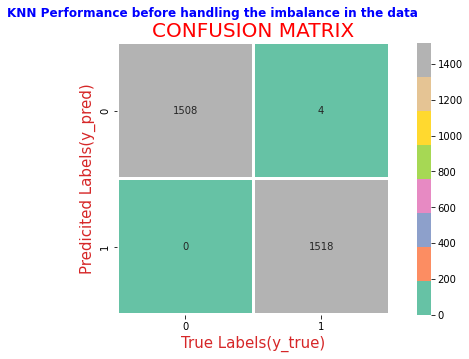

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#cm vizualization
import seaborn as sns 
f, ax =plt.subplots(figsize = (10,5))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance before handling the imbalance in the data", color = 'b', weight = 'bold')

sns.heatmap(cm,annot = True, cmap="Set2", linewidths= 2, linecolor="white", fmt="d", square = True, ax=ax)  #fmt changes the values inside the square box
plt.xlabel("True Labels(y_true)", fontsize = 15, color = 'tab:red')
plt.ylabel("Predicited Labels(y_pred)", fontsize = 15, color = 'tab:red')
plt.title("CONFUSION MATRIX",fontsize=20, color = 'r')
plt.show()

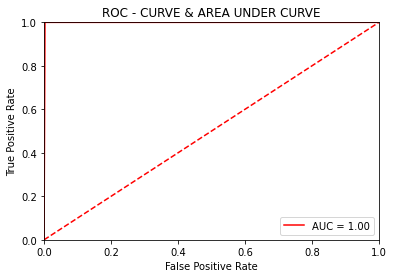

In [ ]:
#ROC curve and Area under the curve plotting
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(x_test_sc)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC - CURVE & AREA UNDER CURVE')
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
